#Task
1. Develop a database of faces.
2. Perform Singular value decomposition to develop the eigenfaces.
3. Observe the most dominant eigen vectors in the decomposition and how many would be required to represent a face approximately.
4. Project any given test faces onto the eigenfaces(New-Coordinate System) and develop a unique key for each test face.
5. Display the projection (linear model approximation) and visualize how increasing the eigen bases develops more refined image.

**Classification**
1. Use the Eigen Basis to seperate images of two people based on the model coefficients.
2. Use the above to perform image classification to detect which group does a new test image belong to.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

In [2]:
train_data_path = '/content/drive/MyDrive/olivette faces/olivetti_faces.npy'
test_data_path = '/content/drive/MyDrive/olivette faces/olivetti_faces_target.npy'
train_ds = np.load(train_data_path)
test_ds = np.load(test_data_path)

In [3]:
# test_ds contains the index number of a person.
unique_persons = list(np.unique(test_ds))
print(f'The Label for all the unique is:\n{unique_persons}')

The Label for all the unique is:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [4]:
train_img_database, test_img_database, train_label_database, test_label_database = train_test_split(train_ds, test_ds, test_size=0.10, random_state=42)
print(f'Shape of train_images_database: {train_img_database.shape}')
print(f'Shape of train_images_database: {train_label_database.shape}')
print(f'Shape of train_images_database: {test_img_database.shape}')
print(f'Shape of train_images_database: {test_label_database.shape}')

Shape of train_images_database: (360, 64, 64)
Shape of train_images_database: (360,)
Shape of train_images_database: (40, 64, 64)
Shape of train_images_database: (40,)


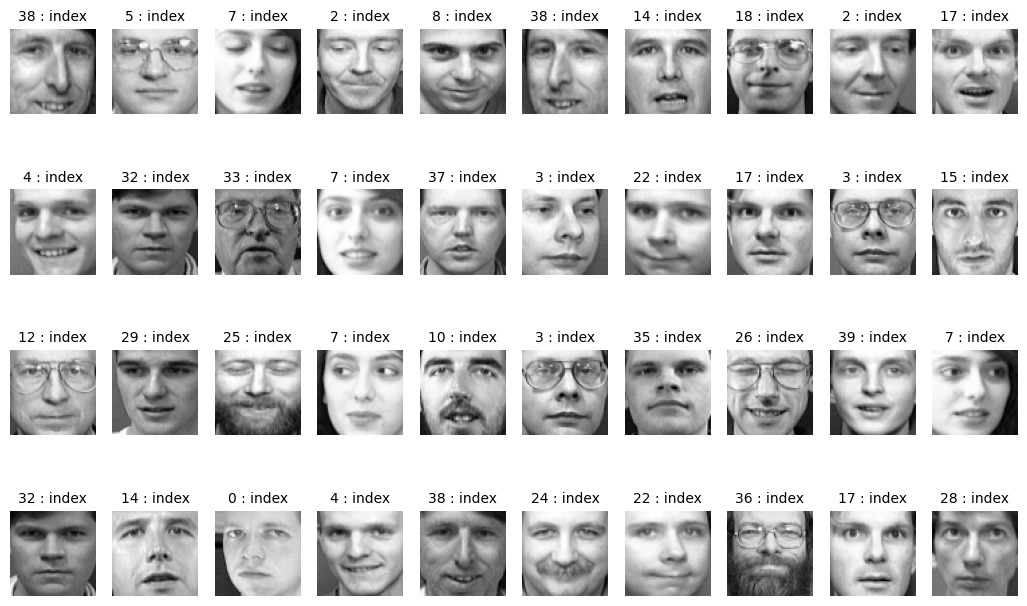

In [5]:
# Let us plot the first 40 train images and crrosponding labels out of the 400 images:
fig, axes = plt.subplots(nrows = 4, ncols = 10, figsize = (13,8))
n = 0
for i in range(4):
  for j in range(10):
    axes[i, j].imshow(train_img_database[n], cmap = 'gray')
    axes[i, j].set_title(f'{train_label_database[n]} : index', fontsize=10)
    axes[i, j].axis('off')
    n += 1
    if n>40:
      break

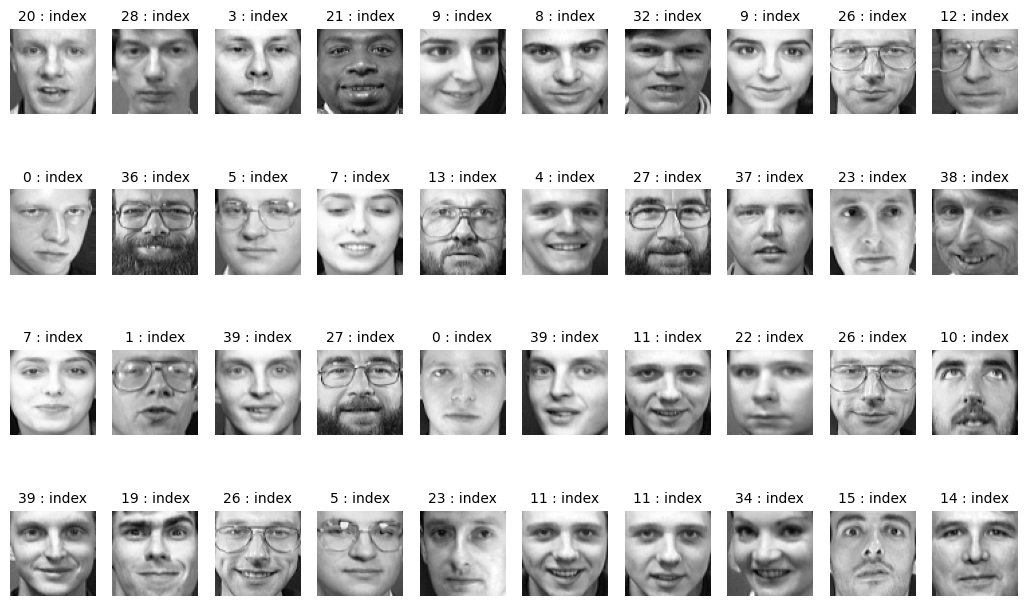

In [6]:
# Let us plot the 40 test images and the corrosponding labels:
fig, axes = plt.subplots(nrows = 4, ncols = 10, figsize = (13,8))
n = 0
for i in range(4):
  for j in range(10):
    axes[i, j].imshow(test_img_database[n], cmap = 'gray')
    axes[i, j].set_title(f'{test_label_database[n]} : index', fontsize=10)
    axes[i, j].axis('off')
    n += 1
    if n>40:
      break

In [7]:
# Let us create a large face dataset where each column represents a face and the matrix has atotal of 400 faces.
# Observe that each of the face is a vector in 4096 dimensional space. #(360, -1)
def flatten_image(image_database, new_shape):
  face_ds = np.reshape(image_database, (new_shape))
  flattened_db = np.transpose(face_ds)
  #print(f'The shape of the flattened database is: {flattened_db.shape}')
  return flattened_db

face_ds = flatten_image(train_img_database, (360, -1))
print(f'The shape of the face_ds is: {face_ds.shape}')

The shape of the face_ds is: (4096, 360)


Text(0.5, 1.0, 'The mean face')

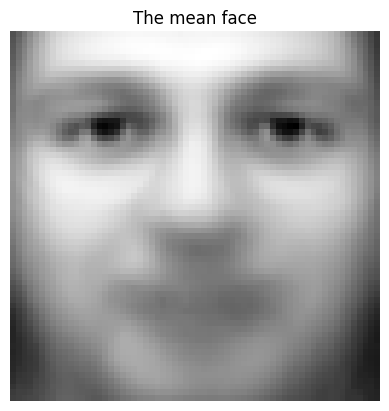

In [8]:
# Let us calulate the mean face and subtract it from all the faces:
mean_face = np.mean(face_ds, axis = 1)
plt.imshow(np.reshape(mean_face, (64, 64)), cmap = 'gray')
plt.axis('off')
plt.title('The mean face')

Text(0.5, 1.0, 'Ist Face subtract the Mean')

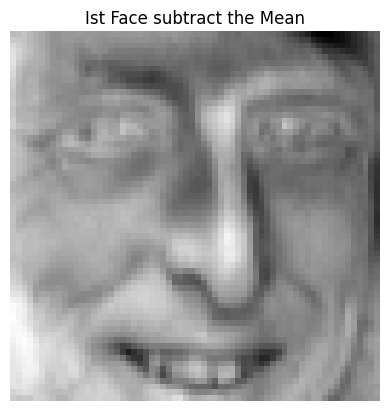

In [9]:
# Subtracting the mean face from the face library dataset-
face_database = face_ds - mean_face[:, np.newaxis]
first_column = face_database[:,0]
plt.imshow(np.reshape(first_column, (64, 64)), cmap = 'gray')
plt.axis('off')
plt.title('Ist Face subtract the Mean')

In [10]:
rank = np.linalg.matrix_rank(face_database)
print(f'The rank of the face database matrix is: {rank}')

The rank of the face database matrix is: 359


#Singular Value Decomposition.

In [11]:
# Performing the Singualar Value Decomposition to get the eigen face vectors. (Eigen vectors in U matrix - of the A'A matrix)
np.random.seed(0)
U, S, VT = np.linalg.svd(face_database, full_matrices = False)
print(f'Shape of the U matrix is: {U.shape}')
print()
print(f'Shape of the S matrix is: {S.shape}')
print()
print(f'Shape of the VT matrix is: {VT.shape}')

Shape of the U matrix is: (4096, 360)

Shape of the S matrix is: (360,)

Shape of the VT matrix is: (360, 360)


The shape of Matrix U is (4096, 400). All the 400 columns are mutually orthonormal thus linearly independent and perfect for defining the basis of any vector R-400 space. These mutually orthogonal vectors form the eigen faces and these can be takes as a new coordinate system.

Any new face is in R-4096 and our column span for matrix U (not face_database) is only R-400. Thus it is mostly possible that the new face (vector) does not lie in the column span of U and we can only solve for the projection of the new face vector onto the C(U). This is similar to the least square regression!

#Energy Distribution of Eigen Vectors!

In [12]:
# Let us define a function that takes in the vector, the number of terms and prints out the culminative energy!
def threshold(S, truncation_point, draw_plot): # If draw plot = 0, we dont see the culm energy graph, else if draw plot = 1, we do see the graph!
  s = 0
  fraction = []
  for i in range(truncation_point):
    s = (s + S[i])
    frac = (s/np.sum(S))*100
    fraction.append(frac)
  if draw_plot == 1:
    erergy_frac = (s/np.sum(S))*100
    plt.figure(figsize = (14,5))
    plt.subplot(1,2,2)
    plt.plot(fraction)
    plt.xlabel('Number of eigen values takes')
    plt.ylabel('Culminative Energy')
    plt.title(f'Cul-Energy of the first {truncation_point} eigen vectors: {erergy_frac}%')
    plt.subplot(1,2,1)
    plt.plot(S)
    plt.xlabel('Eigen Value number')
    plt.ylabel('Eigen Value')
    plt.title('Distribution of Eigen Values wrt the Eigen Vectors in U matrix')
  elif draw_plot == 0:
      erergy_frac = (s/np.sum(S))*100
      print(f'The culminative energy contained in {truncation_point} modes is {erergy_frac}%')


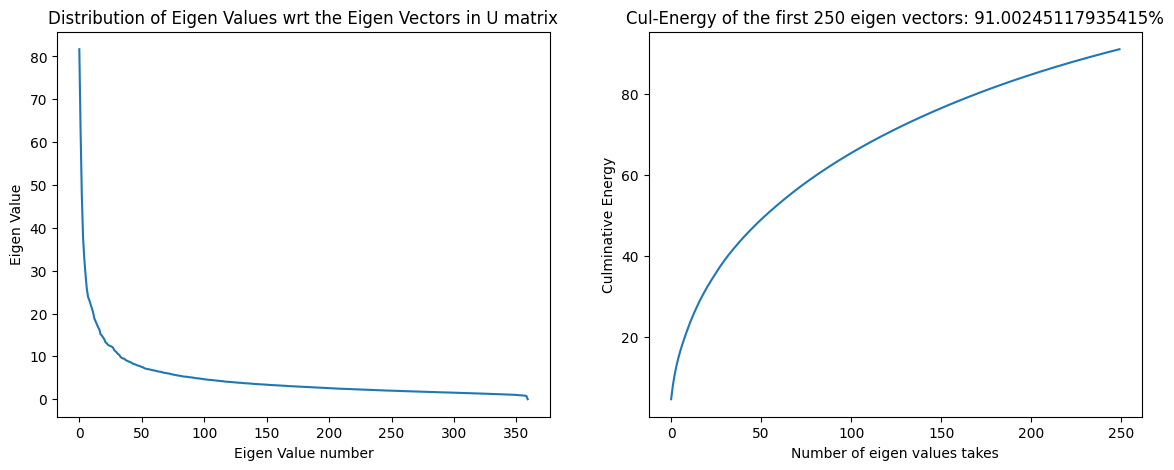

In [13]:
# Instantiating the function
threshold(S, 250, 1)

Observe that the most dominant Eigen Values (and corrosponding Eigen Vectors) are contained within the first 200 eigen vectors.

#Visualizing the Eigen Faces!
1. Note that the Eigen Faces are basically vectors. These are the eigen vectors of the left singular matrix i.e U (AAT). All the Eigen Faces are mutually orthogonal and represent the basis for a space R-Truncation point.

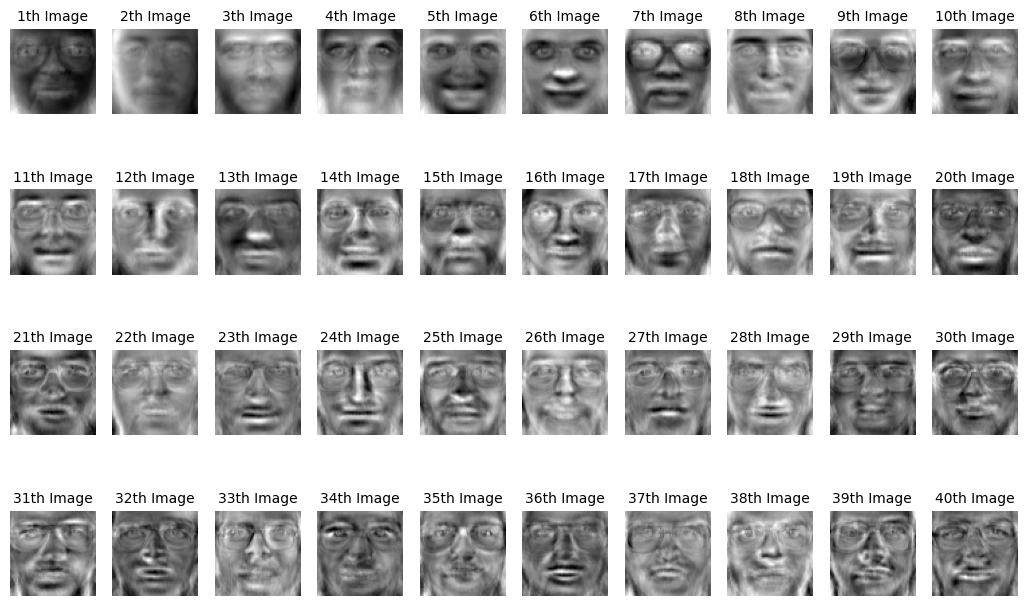

In [14]:
# Let us plot the first 40 images out of the 400 images:
fig, axes = plt.subplots(nrows = 4, ncols = 10, figsize = (13,8))
n = 0
for i in range(4):
  for j in range(10):
    axes[i, j].imshow(np.reshape(U[:, n], (64,64)), cmap = 'gray')
    axes[i, j].set_title(f'{n+1}th Image', fontsize=10)
    axes[i, j].axis('off')
    n += 1
    if n>40:
      break

#Projection of face onto the Eigen coordinate faces!
Let us take vectors in the test dataset and create a linear model approximation for it **U(x_approx) = test_eig_face**. We are basically trying to represent a new test face in terms of linear combination of the eigen vector faces in the U matrix. Even if a perfect solution does not exist, we will try to solve for the projection of the test face on the span of eigen faces.

span(U) = R-(truncation point)

new face = R-(4096)

In [15]:
print(test_img_database.shape)
print(test_label_database.shape)

(40, 64, 64)
(40,)


In [16]:
# Flatten the test image database:
flatten_test_db = flatten_image(test_img_database, (40, -1))
print(f'The shape of flatten_test_bd is : {flatten_test_db.shape}')

The shape of flatten_test_bd is : (4096, 40)


In [17]:
# Let us take the first face and project it onto the eigen faces basis.
# Normal form : (ATA)x' = (AT)b ---- UTU = 1 => x' = (AT)b, where b is the test face!
# Observe that we can control the rank of U.

#Taking full rank of U
def identification_key(face_number_index, truncation_point, draw_bar_plot):
  if face_number_index <= (flatten_test_db.shape[1]):
    test_face = flatten_test_db[:,face_number_index]
    test_face -= mean_face
    u_truncated = U[:, 0:truncation_point]
    x_approx = np.matmul(np.transpose(u_truncated), test_face)

    #The unique identification key for testface 'face_number_index' is:
    if draw_bar_plot == 1:
      threshold(S, truncation_point, 1)
      instances = list(np.arange(1, len(x_approx)+1))
      values = x_approx
      values = values.flatten().tolist()
      plt.figure(figsize=(12, 6))
      plt.bar(instances[0:truncation_point], values[0:truncation_point])
      plt.xlabel('Independent Variables')
      plt.ylabel('Significance or Slope')
      plt.title(f'Combination of first {truncation_point} eigenfaces of U to for {face_number_index}th Test Face projection')

  elif face_number_index > (flatten_test_db.shape[1]):
    print(f'The input index is incorrect, as the max columns in {flatten_test_db.shape[1]}')
  return x_approx, u_truncated

In [18]:
truncation_point = 300
x, u_hat = identification_key(0, truncation_point, 0)

This is the closest face to the given test face that can be represented as a liner combination of Eigen-faces


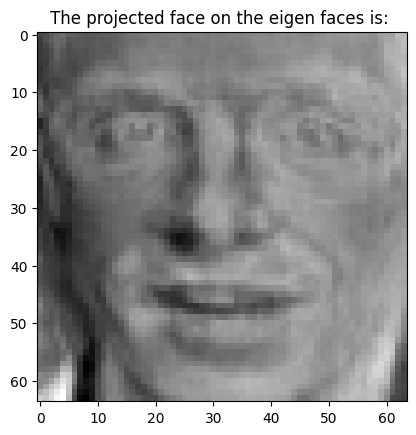

In [22]:
projection = np.matmul(u_hat, x)
face = np.reshape(projection, (64, 64))
plt.imshow(face, cmap = 'gray')
plt.title('The projected face on the eigen faces is: ')
print('This is the closest face to the given test face that can be represented as a liner combination of Eigen-faces')

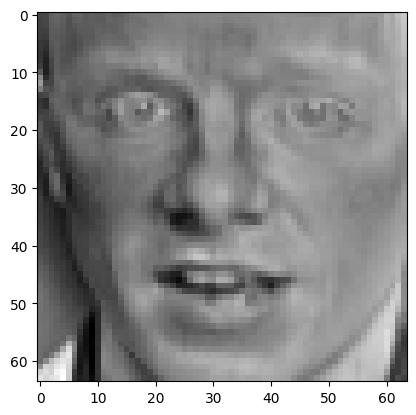

In [21]:
first_test_face = flatten_test_db[:,0]
plt.imshow(np.reshape(first_test_face, (64, 64)), cmap = 'gray')

#Image Classification!

In [30]:
# Let us take the first two eigen-vectors of U with the highest eigen values -
u = U[:, 0:2] # This represents the most important two new coordinate axis!

# Using the first 9 images of face 1 and 9 images of face 2
images = train_ds[0:20, :, :]
flatten_images = np.reshape(images, (20, -1))
flatten_images = np.transpose(flatten_images)
labels = test_ds[0:20]

# Columns to drop (9 and 19 in this case)
columns_to_drop = [9, 19]

# Dropping the columns
new_face_db = np.delete(flatten_images, columns_to_drop, axis=1)
new_label_db = np.delete(labels, columns_to_drop)

print(new_face_db.shape)
print(new_label_db.shape)

(4096, 18)
(18,)


In [51]:
# Finding the combinations of u1 and u2 to approximate first 18 faces!
a = []
for i in range(new_face_db.shape[1]):
  proj = np.matmul(np.transpose(u), new_face_db[:,i])
  a.append(proj)
a = np.array(a)

# Let us take a test person - say column 9 from the train_ds and project it also on u1 and u2 basis-
trial_face = flatten_images[:, 19]
trial_proj = np.matmul(np.transpose(u), trial_face)
print(a.shape)
print(trial_proj.shape)

(18, 2)
(2,)


The first and second column of **a** represents the coefficient of u1 and u2 whoes linear combination gives the closest face (projection) on the eigen faces!

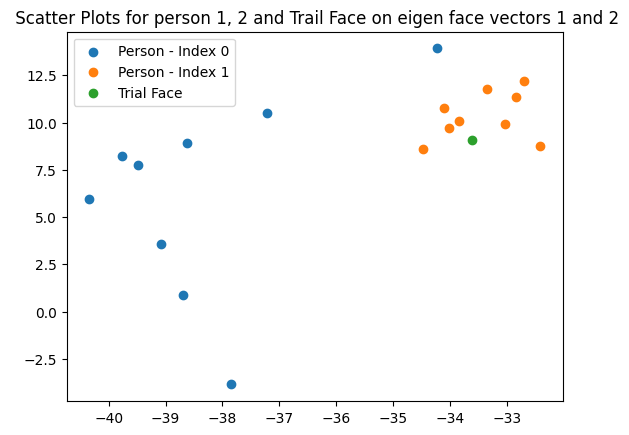

In [52]:
# Creating a scatter plot for the two groups of people and checking if there exists clusters
plt.scatter(a[:9,0], a[0:9,1], label = 'Person - Index 0')
plt.scatter(a[9:,0], a[9:,1], label = 'Person - Index 1')

# Plotting the index 1 person face to see which cluster it belongs to--
plt.scatter(trial_proj[0], trial_proj[1], label = 'Trial Face')

plt.title(' Scatter Plots for person 1, 2 and Trail Face on eigen face vectors 1 and 2')
plt.legend()

#Conclusion
Observe that the Trial-Face which we know belonged to the Person 2 index is shown in the above cluster as being very close to Person-Index 1. So this method of eigen faces can be used to perform classification algorithm!